# 캐글 타이타닉 승객 데이터 분석

#### 타이타닉 승객들의 데이터를 분석하고,
#### 승객들의 생존 여부를 예측하는 프로젝트

In [1]:
import pandas as pd
# 판다스 임포트


## 데이터 로드 및 분석

판다스를 이용하여 데이터를 로드하고 간단하게 분석해봄.

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
# 데이터셋 로드


In [3]:
train.head()
# 데이터가 잘 로드되었는지 확인해보기


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터에 대한 간략한 설명

1. PassengerId : 승객 고유번호
2. Survived : 생존여부 (0 : 사망 / 1: 생존)
3. Pclass : 객실등급 (1: 가장좋은 객실 ~ 3 : 가장 안좋은 객식)
4. Name : 승객 이름
5. Sex : 승객 성별
6. Age : 승객 나이
7. SibSp : 타이타닉호에 같이 탑승한 가족/친척의 수 (0명 ~ n명)
8. Parch : 같이 탑승한 부모 혹은 자녀의 숫자 (0명 ~ n명)
9. Ticket : 티켓 고유번호
10. Fare : 운임 (비용)
11. Cabin : 선실번호 (Nan은 데이터없음)
12. Embarked : 승선위치 (C : 세르부르 / S : 사우스햄튼 / Q : 퀸즈타운)


In [4]:
test.head()
# 테스트 데이터셋 확인
# 이 승객들의 생존여부를 예측해야 하므로, 생존 여부가 빠져있음


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('트레이닝 데이터셋의 사이즈', train.shape)
print('테스트 데이터셋의 사이즈', test.shape)
# shape 확인해보기


트레이닝 데이터셋의 사이즈 (891, 12)
테스트 데이터셋의 사이즈 (418, 11)


In [6]:
train.info()
# 트레이닝 데이터셋 정보 확인
# 자세히 보면, Age(나이) 데이터와 Cabin(선실)데이터는 없는것도 다수있음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()
# 테스트 데이터셋 정보확인
# 마찬가지로, Age(나이) 데이터와, Cabin(선실) 데이터는 일부 없음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()
# 트레이닝 데이터의 누락된 데이터 숫자


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()
# 테스트 데이터의 누락된 데이터 숫자


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 시각화를 위한 라이브러리 임포트

matplotlib과 seaborn을 사용할 것임.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [11]:
# bar 차트를 그려주는 함수 정희
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))



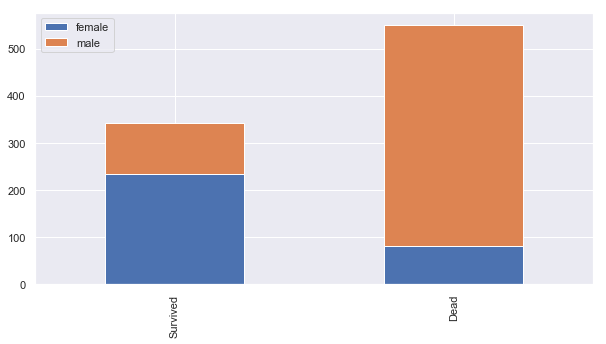

In [14]:
bar_chart('Sex')
# 성별이 죽었는지 살았는지에 대해 얼마나 영향을 미쳤는지 보여줌


여성 승객은 비교적 많이 생존한 것에 비해, 남성 승객은 높은비율로 사망한 것을 알 수 있음. <br>
당시 상황으로 여성들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있음.

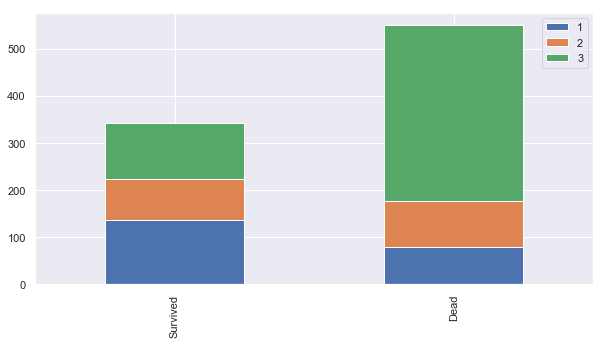

In [18]:
bar_chart('Pclass')
# 객실 등급에 따라 생존율을 나타냄


1등급 객실에 탑승했던 승객이 3등급 객실에 탑승했던 승객에 비해 높은 비율로 살아남았다는 것을 알 수 있음. <br>
역시 1등급 객실에 탑승한 승객들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있음.


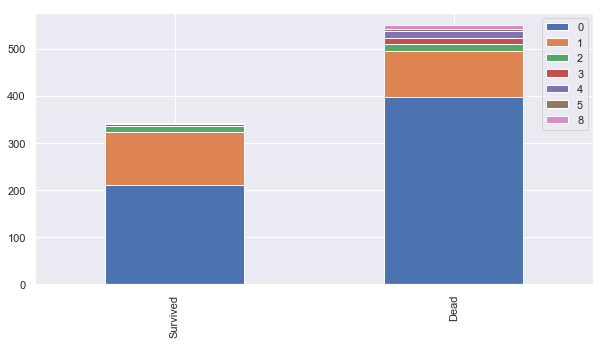

In [19]:
bar_chart('SibSp')
# 가족이나 친척의 숫자에 따른 생존율을 나타냄


크게 눈에 띌만한 유의미한 결과를 찾기 어려웠음. <br>
친척/가족 1명과 함께 탑승한 인원은 다른 인원에 비해 생존률이 아주 조금 높았고, <br>
3명 이상의 가족과 함께 탑승한 인원은 대부분 사망한 것을 알 수 있음.

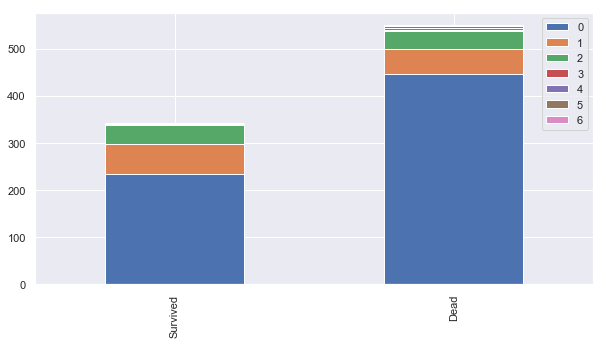

In [20]:
bar_chart('Parch')
# 부모 혹은 자녀와 함께 탑승했는지 여부에 따른 생존율을 나타냄


역시 유의미한 결과를 찾기 어려웠음. <br>
위와 마찬가지로 부모/자녀 1명과 함께 탑승한 인원은 생존율이 아주 약간 높았으나, 눈에 띌 정도는 아님. <br>
마찬가지로 3명 이상 함꼐 탑승한 승객들은 거의 대부분 사망하였음.

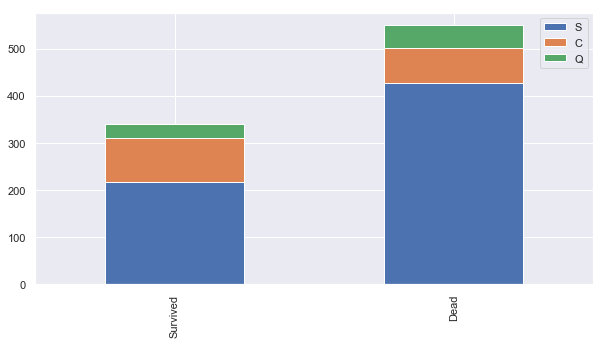

In [23]:
bar_chart('Embarked')
# 승선위치에 따른 생존률을 나타냄


마찬가지로 유의미한 결과를 찾기 어려움.